# Improving a Neural Net: Hyperparameters Tuning
## 1. Train, dev, test sets
### 1.1 Neural Net: Hyperparameters:
For a Neural network, there are certain values that affect the performance, yet do not change during the model's training:
1. number of hidden layers
2. number of units in each layer
3. activation functions
4. learning rate
5. convergence criteria
### 1.2 distribution
For relatively small $m \leq 10000$, a suitable divison's rule of thumb would be: $60\%$, $20\%$ and $20\%$ for train, dev (CV) and test sets respectively. Yet, as the main goal of dev set is to determine the most efficient combination of hyperparameters, there is no need for a large training set. Hence, a suggested distribution when $m \approx 10 ^ 6$ or larger is: $98\%$, $1\%$ and $1\%$.
Additionally, it is of extreme importance to have all data sets with the same distribution, or the same quality, speaking more informally.

## 2. Bias and Variance
### 2.1  Recall:
The following [notebook](https://github.com/ayhem18/Towards_Data_science/blob/master/Machine_Learning/generalities/evaluating_ML_algorithm.ipynb) provides a basic introduction to the notions of ***bias*** and ***variance*** along with additional general tools such as ***learning curves***.
### 2.2 Bias and Variance for Neural Net:
A Neural Net's low performance can be tackled as follows: 
1. Consider the high bias possibility (poor performance of training dataset): if it is the case, then:
    * bigger network: larger number of hidden units per layer
    * deeper network: larger number of hidden layers
    * consider a different Neural network architechture
2. Consider the high Variance possibility (high performance with train set and poor one with CV set):
    * more training data 
    * regularization
    * consider a different Neural network architechture

### 2.3 Regularization methods
#### 2.3.1 L2 method
This method is discussed in the following [notebook](https://github.com/ayhem18/Towards_Data_science/blob/master/Machine_Learning/generalities/evaluating_ML_algorithm.ipynb)
#### 2.3.2 DropOut method
The main idea is to eliminate certain hidden units in every layer with a certain probability. More formally, assigning $0$ to certain hidden units with a propability $p$. $p$ can vary from one layer to another. Such procedure decreases the weighs as well as distributes them along the different units in that layer.
The procedure can be expressed as follows for a say the layer $l$:
1. dl = (np.random.rand(al.shape) $< p$): creates a boolean array refleting the inequalities
2. al = dl * al (assigning the value $0$ to every hidden unit corresponding to a value larger than $p$ in dl)
3. a3 /= p

As for the last step, on average (1 - p) of the elements will be set to $0$. Thus, the expected value of all units will be multiplied by $p$. To have the original expected value, we need to divide by $p$

#### 2.3.3 Early Stopping
This method is slightly different from the previously mentioned techniques as it tackles both training the model and overfitting. 
Assuming the model is not underfitting the train dataset, then the cost function over training data $J_t$ and dev data $J_d$ with respect to number of iterations can have similar graphs:

[ 2.30258509  1.93507413  1.66692336 ... -4.38091568 -4.38147131
 -4.38202663]
[ 2.67138538  2.30428414  2.03654355 ... -1.66866358 -1.66620602
 -1.66374481]


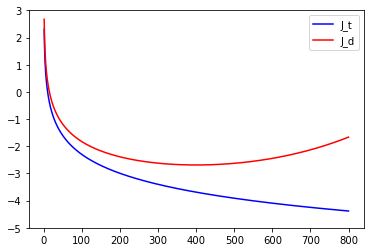

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# 200 linearly spaced numbers

x = np.linspace(1, 800,1800)
# x.reshape((1, x.shape[0]))
# the sigmoid function
J_t = - np.log(x / 10)
stopping_point = 400
J_d = - np.log(x / 10) + np.exp(np.fmax((x - stopping_point) / stopping_point, np.array([-1])))
print(J_t)
print(J_d)

fig, ax = plt.subplots()
ax.set_ylim(-5, 3)
ax.plot(x, J_t , 'b', label='J_t')
ax.plot(x, J_d , 'r', label='J_d')
leg = ax.legend();

Ps: The functions are chosen for their similarities to the graphs of the actual $J_t$ and $J_d$ functions. No mathematical justification.

The main idea is to choose the value where the difference between the two error functions is neither too small nor too large. Such a method might not be optimal as it tries to solve two different issues simultaneously.

## 3. Initialization to solve vanishing and exploding gradients
For deep Neural networks, it is quite possible for the weights to increase and decrease exponentially. Therefore, it slows significantly the learning algorithm. Such a situation can be partially addressed with a careful random initilization:
Consider the following single neuron: 

![single neuron](https://github.com/ayhem18/Towards_Data_science/blob/master/Machine_Learning/Neural_Networks/single_neuron.png?raw=true)

$\begin{equation}
z = w_1 \cdot x_1 + w_2 \cdot x_2 ... + w_n\cdot x_n 
\end{equation}$
for large values of $n$, it is preferrable for $w_i$ to be small enough not to make $z$ explode and not too small to make it vanish.
Thus, variance should be set to 
$\begin{equation}\sigma ^ 2 = \frac{c}{n}\end{equation}$
where $c$ depends on the activation function associated with the hidden layer. 
* for Relu, c = 2
* for tanh, c = 1

The final initialization would be
$\begin{equation}W^{([l])} = np.random.rand(shape) * \sqrt(\frac{c}{n^{[l - 1]}})\end{equation}$

## 4 Hyperparameters Tuning 
### 4.1 Methadology
Previously, Deep learning practitioners used grid methadology. For $n$ hyperparameters, the engineer in question, would prepare $n$ sets of values. $[a_{11}, a_{12}...a_{1m}]$ where each set reprents possible values for a specific hyperparameter. The engineer experiments with all the combinations.

Such approach might no longer be optimal due to the increased number of parameters and the difference in their importance. Alternatively, It is recommended to try random values within the predefined ranges (not sets) for each of the hyperparameters

#### 4.1.1 Coarse to fine
Assuming a number of combinations proved to be more efficient than others, it might be worth the time to reduce the search space and retry the same proceedure in the region that acheived satisfying results.

#### 4.1.1 Scaling hyperparameters
It is note worthy that not all hyperparameters vary within the same range. Some vary from [0.0001 ... 1]. Others from [2..100]. A random linear distribution would be perfectly fine on the second range. Yet, it is not the case for the second one.

Hyperparameters in ranges like [0.0001 ... 1] tend to be very insensitive towards end points. In other words even differences estimated in the vecenity of $10^{-4}$ can significantly affect the algorithm's performace. When using a linear random distribution: $10\%$ of the values would assigned to the range [0.0001 ... 0.001] while the remaining $90 \%$ would be distributed on the rest of the interval. This is might be harmful for the application taking into consideration that both ranges are of equivalent importance. A more adequate appoach on ranges $[10^{-a} ... 10^{-b}]$ is to consider the random variable $x$ distributed on $[b, a]$ and then consider the values $10 ^ {-x}$ for the hyperparameters. 